In [58]:
# Assignment 1: Training a neural network with Iris-dataset

In [59]:
# Importing the libraries needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras as K
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten
from keras.utils import to_categorical

In [60]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url, names=columns)
print(data.head())
print(data.shape)

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

# One-hot encode
data['species'] = pd.Categorical(data['species']).codes

# Split the data into input and output features
x = pd.DataFrame(data.drop('species', axis=1))
y = to_categorical(data['species'])

print(x.head())
print(y[:5])


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)
   sepal_length  sepal_width  petal_length  petal_width
0           6.3          2.7           4.9          1.8
1           5.0          3.2           1.2          0.2
2           5.0          3.3           1.4          0.2
3           5.0          2.3           3.3          1.0
4           6.4          2.8           5.6          2.2
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [61]:
# Model

In [ ]:
# Define the model
model = Sequential([
    Input(shape=(4,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer=K.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stop
early_stop = K.callbacks.EarlyStopping(monitor='val_loss',
                                       patience=10,
                                       restore_best_weights=True)

# Train the model
history = model.fit(x, y,
                    epochs=200,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[early_stop])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                160       
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Final accuracy: 0.98
Final loss: 0.07


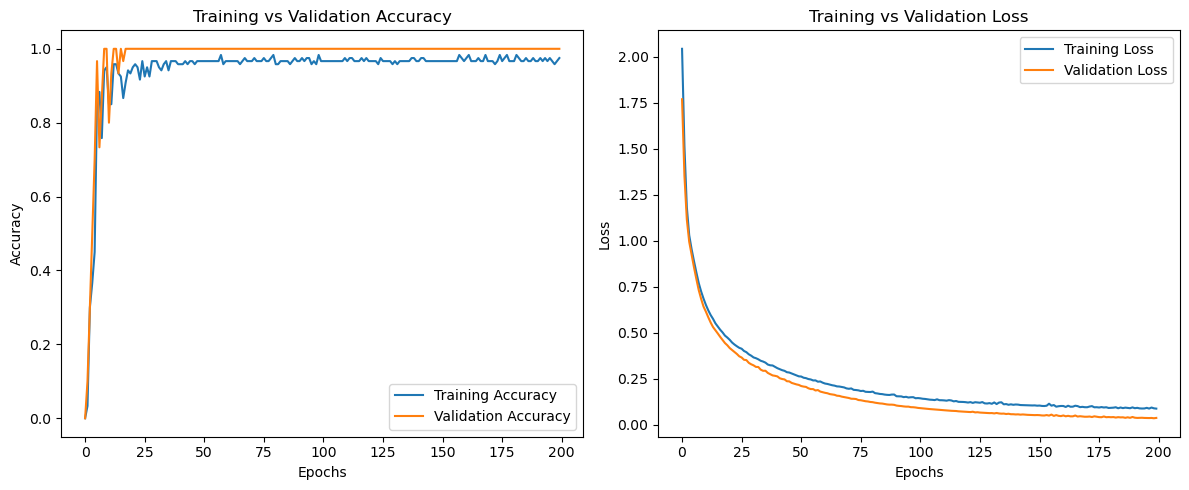

In [ ]:
# Print the final accuracy and loss
test_loss, test_acc = model.evaluate(x, y, verbose=0)
print(f"Final accuracy: {test_acc:.2f}")
print(f"Final loss: {test_loss:.2f}")

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
